[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/royforestano/Deep_Learning_Symmetries/blob/main/Deep_Learning_Symmetries_and_Their_Lie_Groups_Algebras_Subalgebras_from_First_Principles/sym_demo.ipynb)

# Deep Learning Representations

## Spin-$j$ representation of SO(3)

The group $\mathrm{SO}(3)$ has a [spin-$j$ representation](https://en.wikipedia.org/wiki/3D_rotation_group#A_note_on_Lie_algebras) $V_{2j+1}$ of dimension $2j+1$ for each $j=0,1,\ldots$ These can be thought of as the vector spaces spanned by the spherical harmonics. They play an important role in the [Euclidean neural networks framework](https://e3nn.org/), as well as in quantum mechanics, astronomy, chemistry...

First goal: to learn the 5-dimensional representation of SO(3) (the spin-2 rep) by using an SO(3)-invariant oracle obtained by classical invariant theory.

Note that this uses the 'old' architecture, so there could be some further improvements using the Greedy/LBT methods.

In [1]:
# pip install torch
# pip install torchvision

In [2]:
from sym_utils import *
%matplotlib inline

Using cpu device


In [3]:
def sqrt(x):
    return np.sqrt(x)

def oracle_norm(data):
    return torch.norm(data,dim=1)

def oracle_spin2_deg2(data):
    if data.shape[1] != 5:
        raise ValueError(f'For the spin 2 representation, the vectors must lie in 5-dimensional space. Received: {data.shape[1]}')
    SO3_poly_data = [((0, 0), 1), ((1, 1), 1), ((2, 2), 1), ((3, 3), 1), ((4, 4), 1)] # Turns out to be SO(3) invariant even if the rep is not spin2!!
    output = 0
    for tup,coeff in SO3_poly_data:
        prod = coeff
        for i in tup:
            prod *= data[:,i].reshape(data.shape[0],1)
        output += prod
    return output

def oracle_spin2_deg3(data):
    if data.shape[1] != 5:
        raise ValueError(f'For the spin 2 representation, the vectors must lie in 5-dimensional space. Received: {data.shape[1]}')
    SO3_poly_data = [((0, 0, 2), 1), ((0, 1, 3), -sqrt(3)), ((1, 1, 2), -1/2), ((1, 1, 4), 1/2*sqrt(3)), ((2, 2, 2), -1/3), ((2, 3, 3), -1/2), ((2, 4, 4), 1), ((3, 3, 4), -1/2*sqrt(3))]
    output = 0
    for tup,coeff in SO3_poly_data:
        prod = coeff
        for i in tup:
            prod *= data[:,i].reshape(data.shape[0],1)
        output += prod
    return output

In [4]:
n       = 300
n_dim   = 5 # Spin-2 rep is 5-dimensional
n_gen   = 3    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_spin2_deg3

Epoch 1   |  Train Loss: 61.38425676528778
Epoch 101   |  Train Loss: 27.59949680505527
Epoch 201   |  Train Loss: 16.53536484271141
Epoch 301   |  Train Loss: 11.67007264783269
Epoch 401   |  Train Loss: 9.003167384775846
Epoch 501   |  Train Loss: 7.204052861941122
Epoch 601   |  Train Loss: 5.820068024085805
Epoch 701   |  Train Loss: 4.6089505037321
Epoch 801   |  Train Loss: 3.376695985997395
Epoch 901   |  Train Loss: 2.118491073079602
Epoch 1001   |  Train Loss: 1.1009318507105255
Epoch 1101   |  Train Loss: 0.4938063237861057
Epoch 1201   |  Train Loss: 0.20308992382218027
Epoch 1301   |  Train Loss: 0.08001556430202982
Epoch 1401   |  Train Loss: 0.03143985895763904
Epoch 1501   |  Train Loss: 0.012978879664866539
Epoch 1601   |  Train Loss: 0.005999875595046742
Epoch 1701   |  Train Loss: 0.0032549335225461142
Epoch 1801   |  Train Loss: 0.002060794680439851
Epoch 1901   |  Train Loss: 0.0014542408649455198
Epoch 2001   |  Train Loss: 0.001092424461727024
Epoch 2101   |  Trai

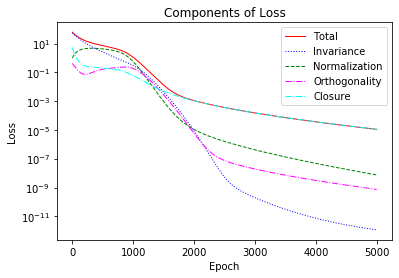

In [5]:
# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[-1.4065e-04, -4.1576e-01, -4.9844e-06,  6.8209e-03,  3.2918e-01],
        [ 4.1576e-01, -1.0011e-04,  1.1933e-02,  1.6459e-01,  7.0262e-03],
        [-5.0574e-06, -1.2051e-02, -2.5933e-04,  7.2012e-01,  1.4961e-04],
        [-7.0262e-03, -1.6458e-01, -7.2012e-01, -3.5925e-04,  4.1576e-01],
        [-3.2918e-01, -6.8210e-03,  1.4947e-04, -4.1576e-01, -1.4066e-04]],
       requires_grad=True) 

Generator 2: 
 tensor([[-3.0511e-04, -1.4988e-01,  5.2364e-05, -2.0192e-01, -7.3963e-01],
        [ 1.4966e-01, -1.6120e-04, -3.4982e-01, -3.6986e-01, -2.0208e-01],
        [ 5.2351e-05,  3.4992e-01, -9.4851e-05,  2.5934e-01, -1.5933e-05],
        [ 2.0208e-01,  3.6977e-01, -2.5947e-01, -1.3364e-04,  1.4966e-01],
        [ 7.3963e-01,  2.0192e-01, -1.5918e-05, -1.4988e-01, -3.0513e-04]],
       requires_grad=True) 

Generator 3: 
 tensor([[-1.5426e-04, -6.8506e-02, -4.7420e-05,  3.9896e-01, -3.8023e-01],
        [ 6.8734e-02, -3.3864e-04,  6.9099e-01, -1.9007e-01,  3.9892e-

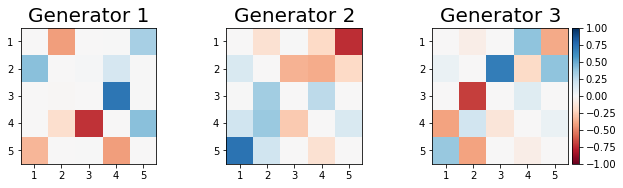

In [6]:
figsizeg = (12,2.5)
rows = 1
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)
#plt.savefig(path+'so3ng3.pdf')

The generators look a bit random (to be expected), but the structure constants don't lie: this is a representation of SO(3). 

Observation: the normalization seems to be (incorrectly) affecting the constants by an overall factor.

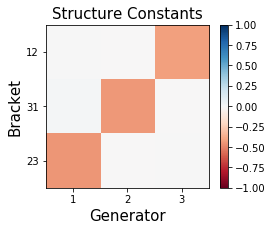

In [7]:
if n_gen>1:
    figsizec=(4,3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)
#plt.savefig('so3_sc.png',bbox_inches='tight')

#### What representation of SO(3) is this?

If you use the spin2_deg2 oracle, you may obtain (depending on the seed), instead of the spin2 representation $V_{5}$, a copy of the usual (spin 1) 3-dimensional representation, plus two copies of the trivial (spin 0) representation, that is:

$$ V_{3} \oplus V_{1} \oplus V_{1}$$

One can distinguish between the two representations by looking at the eigenvalues of the generators: the eigenvalues of any of the three generators on the spin 2 representation should be 2i, i, 0, -i, -2i.

In contrast, on the 3+1+1 representation, they should be i, 0, 0, 0, -i.

We plot the eigenvalues below to show that the network actually learns $V_5$ and not the 3+1+1.

In [8]:
def plot_eigenvalues(eigenvalues):
    real_parts = eigenvalues.real  
    imag_parts = eigenvalues.imag  
    plt.figure(figsize=(8, 6))
    plt.scatter(real_parts, imag_parts, color='blue')
    plt.title('Eigenvalues')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.axhline(0, color='gray', linewidth=0.5)  
    plt.axvline(0, color='gray', linewidth=0.5)  
    plt.axis('equal')
    plt.grid(True)
    plt.show()

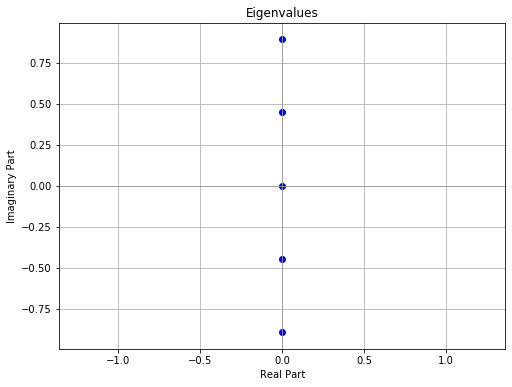

In [9]:
eigs= np.linalg.eigvals(gens_pred[0].detach())
plot_eigenvalues(eigs)

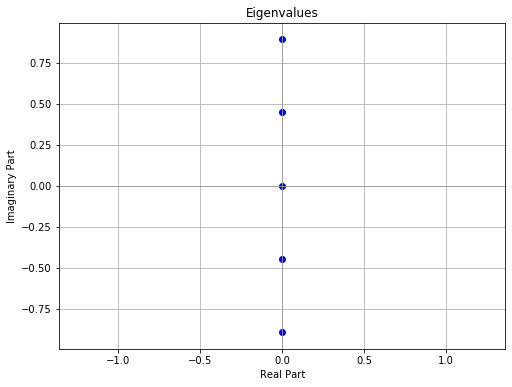

In [10]:
eigs= np.linalg.eigvals(gens_pred[1].detach())
plot_eigenvalues(eigs)

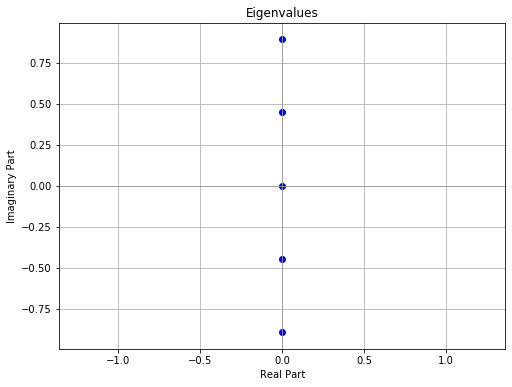

In [11]:
eigs= np.linalg.eigvals(gens_pred[2].detach())
plot_eigenvalues(eigs)

Success! Notice that the eigenvalues are scaled by an overall factor. This should be related to the normalization issue pointed out earlier (it seems to be the same scalar).

### The bad case: why one shouldn't use the spin2_deg2 oracle
The spin-2 invariant polynomial of degree 2 happens to equal the norm on $\mathbb{R}^5$. This makes it possible that SO(3) acts on only 3 of the 5 dimensions as it would act on $\mathbb{R}^3$ (which is bad news). For certain seeds, this will actually happen, as is shown below.

In [12]:
n       = 300
n_dim   = 5 # Spin-2 rep is 5-dimensional
n_gen   = 3    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_spin2_deg2 # Degree 2 oracle

Epoch 1   |  Train Loss: 31.236979284092538
Epoch 101   |  Train Loss: 12.538176122320865
Epoch 201   |  Train Loss: 7.212201655294997
Epoch 301   |  Train Loss: 3.8276956419567973
Epoch 401   |  Train Loss: 1.9419960213755025
Epoch 501   |  Train Loss: 0.9938501228672469
Epoch 601   |  Train Loss: 0.5386262897280307
Epoch 701   |  Train Loss: 0.3329973416340428
Epoch 801   |  Train Loss: 0.24144834747464894
Epoch 901   |  Train Loss: 0.1986488682061215
Epoch 1001   |  Train Loss: 0.17688629257226887
Epoch 1101   |  Train Loss: 0.1648197857281806
Epoch 1201   |  Train Loss: 0.15763416713801884
Epoch 1301   |  Train Loss: 0.15310502451774075
Epoch 1401   |  Train Loss: 0.15008284891820264
Epoch 1501   |  Train Loss: 0.14788775350616584
Epoch 1601   |  Train Loss: 0.1460416224957092
Epoch 1701   |  Train Loss: 0.1441227381988108
Epoch 1801   |  Train Loss: 0.14165497598099877
Epoch 1901   |  Train Loss: 0.13799236009458873
Epoch 2001   |  Train Loss: 0.1321988594894169
Epoch 2101   |  Tr

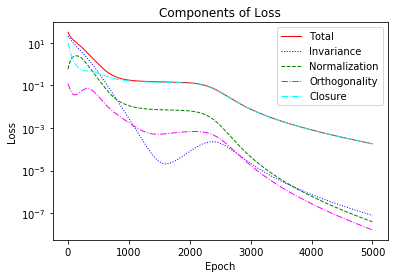

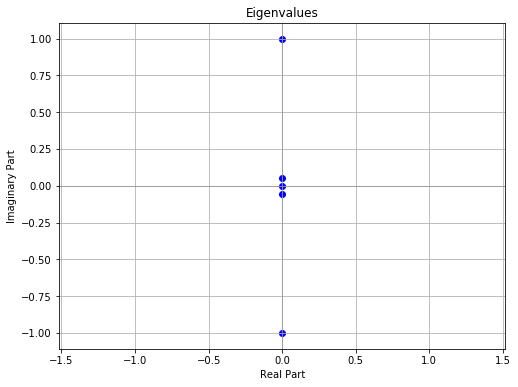

In [13]:
# Set Random Seeds
np.random.seed(0)
torch.manual_seed(19) # Manual seed set to 19, 28, 78 leads to the wrong representation.
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

eigs= np.linalg.eigvals(gens_pred[0].detach())
plot_eigenvalues(eigs)

Observe that (after scaling the generators) the eigenvalues are close to i, 0, 0, 0, -i. This indicates that the learned representation is $V_3\oplus V_1 \oplus V_1$.

## A possible modification of the NN: extra 'irreducibility' term in the loss function

The oracles become harder to describe for higher spins, and the low-degree oracles seem to exhibit the same kind of problem:

In [14]:
def oracle_spin3_deg4(data): # Exhibits the same problem as oracle_spin2_deg2
    if data.shape[1] != 7:
        raise ValueError(f'For the spin 3 representation, the vectors must lie in 7-dimensional space. Received: {data.shape[1]}')
    SO3_poly_data = [((0, 0, 2), 1), ((0, 1, 3), -1/5*sqrt(15)*sqrt(5)), ((1, 1, 2), -1/2), ((1, 1, 4), 1/10*sqrt(15)*sqrt(5)), ((2, 2, 2), -1/3), ((2, 3, 3), -1/2), ((2, 4, 4), 1), ((3, 3, 4), -1/10*sqrt(15)*sqrt(5))]
    [((0, 0, 2, 2), 1),
     ((0, 0, 3, 3), 3/2),
     ((0, 0, 4, 4), 1),
     ((0, 1, 1, 2), -2/21*sqrt(35/2)*sqrt(21/2)),
     ((0, 1, 3, 4), -4/735*sqrt(105)*sqrt(35/2)*sqrt(21/2)*sqrt(7)),
     ((0, 1, 4, 5), -4/21*sqrt(35/2)*sqrt(21/2)),
     ((0, 2, 2, 2), -4/105*sqrt(35/2)*sqrt(21/2)),
     ((0, 2, 3, 5), -4/735*sqrt(105)*sqrt(35/2)*sqrt(21/2)*sqrt(7)),
     ((0, 2, 4, 4), 4/35*sqrt(35/2)*sqrt(21/2)),
     ((0, 2, 5, 5), 2/21*sqrt(35/2)*sqrt(21/2)),
     ((1, 1, 1, 1), 5/12),
     ((1, 1, 2, 2), 1/3),
     ((1, 1, 3, 3), -1/2),
     ((1, 1, 4, 4), 1/3),
     ((1, 1, 4, 6), 2/21*sqrt(35/2)*sqrt(21/2)),
     ((1, 1, 5, 5), 5/6),
     ((1, 2, 3, 4), 4/105*sqrt(105)*sqrt(7)),
     ((1, 2, 3, 6), 4/735*sqrt(105)*sqrt(35/2)*sqrt(21/2)*sqrt(7)),
     ((1, 2, 5, 6), -4/21*sqrt(35/2)*sqrt(21/2)),
     ((2, 2, 2, 2), 1/15),
     ((2, 2, 3, 3), 3/10),
     ((2, 2, 3, 5), -2/105*sqrt(105)*sqrt(7)),
     ((2, 2, 4, 4), 2/15),
     ((2, 2, 4, 6), -4/35*sqrt(35/2)*sqrt(21/2)),
     ((2, 2, 5, 5), 1/3),
     ((2, 2, 6, 6), 1),
     ((3, 3, 3, 3), 3/20),
     ((3, 3, 4, 4), 3/10),
     ((3, 3, 5, 5), -1/2),
     ((3, 3, 6, 6), 3/2),
     ((3, 4, 4, 5), 2/105*sqrt(105)*sqrt(7)),
     ((3, 4, 5, 6), -4/735*sqrt(105)*sqrt(35/2)*sqrt(21/2)*sqrt(7)),
     ((4, 4, 4, 4), 1/15),
     ((4, 4, 4, 6), 4/105*sqrt(35/2)*sqrt(21/2)),
     ((4, 4, 5, 5), 1/3),
     ((4, 4, 6, 6), 1),
     ((4, 5, 5, 6), -2/21*sqrt(35/2)*sqrt(21/2)),
     ((5, 5, 5, 5), 5/12)]
    output = 0
    for tup,coeff in SO3_poly_data:
        prod = coeff
        for i in tup:
            prod *= data[:,i].reshape(data.shape[0],1)
        output += prod
    return output

A possible direction would be to add a term to the loss function $L_{irred}$, which ensures that the eigenvalues are 'spread out' or perhaps just not repeated. In general, on the spin-j representation, the eigenvalues of each generator are $$-j\cdot i, -(j-1)\cdot i, \ldots, (j-1)\cdot i, j\cdot i$$

This property, together with the naive degree $2$ oracle (the Euclidean norm) should ensure that $V_j$ is learnt for any $j$.

Once the representations $V_j$ are consistently learnt (which would already be a good result), one possible direction would be to learn specific direct sums $V_j\oplus V_{j'}$, etc.